<a href="https://colab.research.google.com/github/rautaditya2606/Credt_Card_Fraud_Detection/blob/main/Credt_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#!pip install opendatasets --quiet
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import random
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
database_url = 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'
od.download(database_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rautaditya2606
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 1.15GB/s]

In [3]:
raw_df = pd.read_csv('/content/creditcardfraud/creditcard.csv')

In [4]:
raw_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


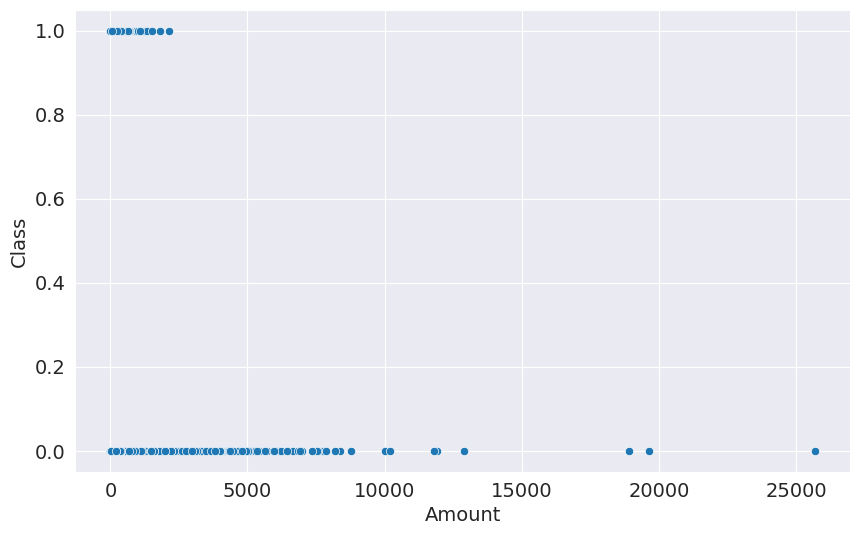

In [5]:
sns.scatterplot(data=raw_df, x='Amount', y='Class') #fraud are under $5000
plt.show()

In [6]:
raw_df['Hour'] = (raw_df['Time'] // 3600) %24

In [7]:
raw_df.corr(numeric_only=True)['Class'].sort_values(ascending=False).head(10)

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


<Axes: xlabel='V11', ylabel='Amount'>

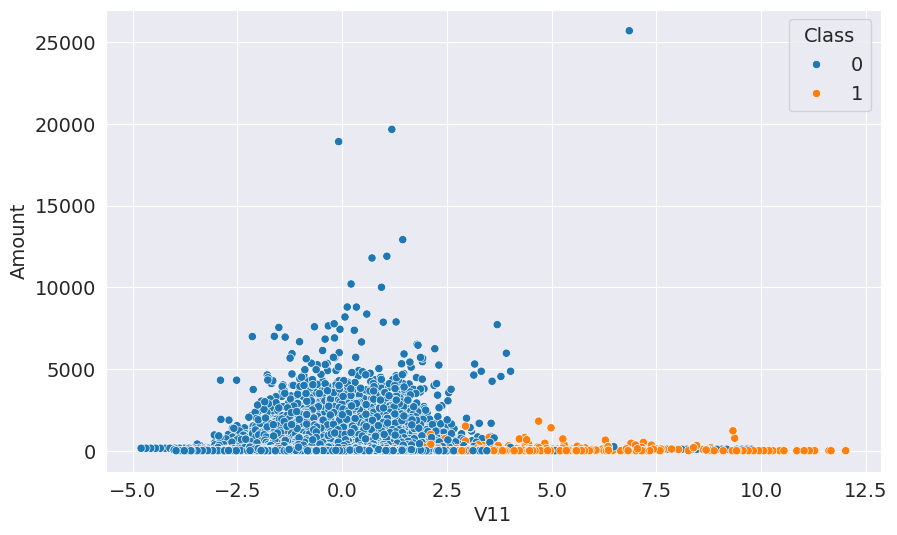

In [8]:
sns.scatterplot(x=raw_df['V11'], y=raw_df['Amount'], hue=raw_df['Class'])

<Axes: xlabel='V11', ylabel='Hour'>

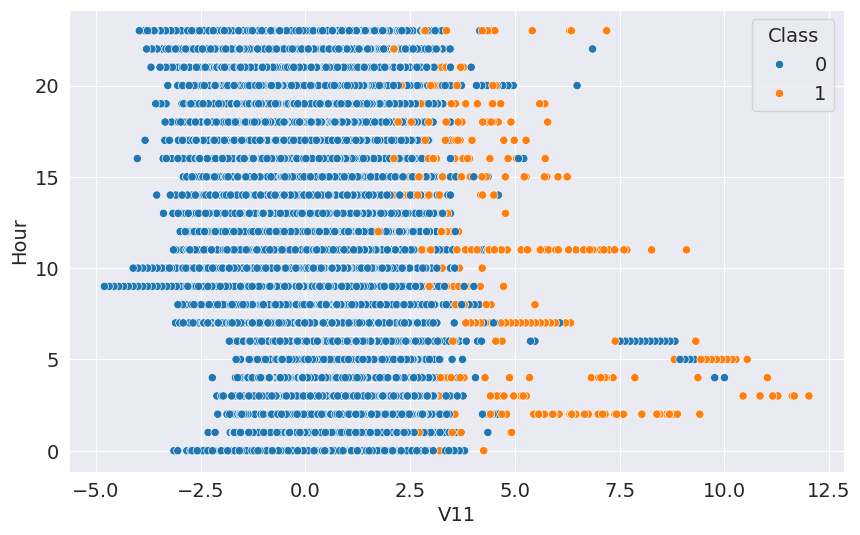

In [9]:
sns.scatterplot(data=raw_df, x='V11', y='Hour', hue='Class')

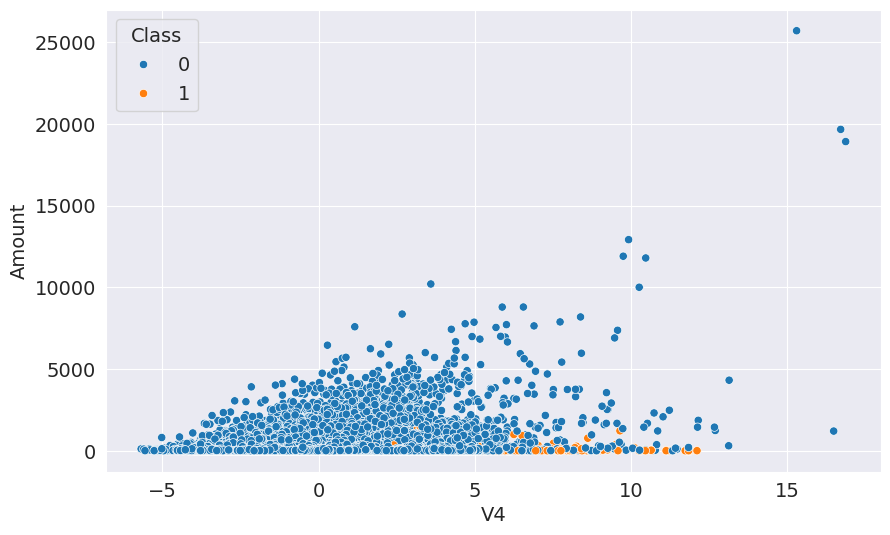

In [10]:
sns.scatterplot(data=raw_df, x='V4', y='Amount', hue='Class')
plt.show()

<Axes: xlabel='V4', ylabel='Hour'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


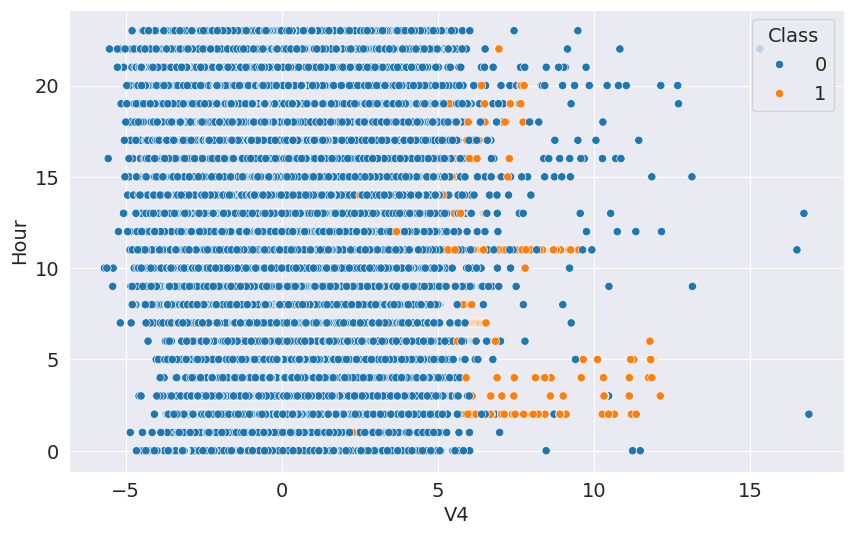

In [11]:
sns.scatterplot(data=raw_df, x='V4', y='Hour', hue='Class')

In [12]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Class'])
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df['Class'])

In [19]:
train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
1458,1131.0,-0.441959,1.080868,1.410925,0.096693,0.135221,-0.706547,0.666114,0.013606,-0.507651,...,-0.469792,0.065107,0.364271,-0.253785,0.079310,0.263524,0.100546,7.15,0,0.0
119883,75619.0,1.226589,0.169271,0.326460,0.493162,-0.123181,-0.313537,-0.009737,-0.048594,0.058451,...,-0.696903,0.113911,-0.289866,0.190943,0.145525,-0.014312,0.013489,9.99,0,21.0
177219,123088.0,1.708188,-0.698579,-0.964903,0.474704,-0.260791,0.238362,-0.589549,0.055753,1.165361,...,-0.082551,0.077579,-0.017251,-0.472592,0.362583,-0.016077,0.022792,171.52,0,10.0
191980,129483.0,2.096642,0.093645,-2.159035,0.955814,1.070886,-0.064135,0.432008,-0.123855,0.193407,...,0.152805,-0.165407,-1.468552,0.579626,-0.417287,-0.025580,-0.089699,1.00,0,11.0
252575,155871.0,-0.569459,-0.956243,2.007415,-1.590362,-0.186744,-0.842440,-0.697689,-0.005533,1.951300,...,1.234458,-0.000220,0.030027,-0.725066,-0.083545,0.068478,-0.007934,21.20,0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24156,33092.0,0.016195,0.837004,1.412539,1.702548,-0.617590,0.261030,-0.535771,-1.523846,0.150172,...,-0.160930,-0.005084,0.633019,0.803724,-0.087087,0.269657,0.239345,1.20,0,9.0
258612,158734.0,-3.385850,3.249002,-2.246492,0.993333,-0.729694,0.947889,-2.819625,-3.795863,-1.957584,...,1.282028,-0.045040,0.039099,0.605973,1.199836,-0.763545,-0.077492,37.69,0,20.0
19453,30296.0,-1.737090,-0.890132,3.420714,0.395711,-0.067610,-0.335518,-0.215682,0.302557,1.503359,...,-0.034168,-0.031295,0.659424,0.629384,-0.565606,-0.144327,-0.131447,79.50,0,8.0
129088,78945.0,-0.637908,1.143421,2.017952,-0.058035,0.144581,-0.646670,0.973703,-0.297624,-0.487969,...,-0.209624,-0.008196,0.627083,-0.378823,0.019724,0.036641,-0.044300,3.96,0,21.0


In [31]:
input_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Hour']
target_cols = 'Class'

In [37]:
scaler = RobustScaler().fit(train_df[input_cols])

In [54]:
x_train = scaler.transform(train_df[input_cols])
x_val = scaler.transform(val_df[input_cols])
x_test = scaler.transform(test_df[input_cols])
train_target = train_df[target_cols]
val_target = val_df[target_cols]
test_target = test_df[target_cols]

In [76]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = XGBClassifier(
    random_state=42,
    n_estimators = 2000,
    max_depth = 7,
    learning_rate = 0.01,
    subsample= 0.8,
    colsample_bytree = 0.8,
    scale_pos_weight = train_target.value_counts()[0] / train_target.value_counts()[1]
)

In [69]:
train_score = cross_val_score(model, x_train, train_target, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Training Mean ROC-AUC', train_score.mean())

Training Mean ROC-AUC 0.9863942137128848


In [70]:
val_score = cross_val_score(model, x_val, val_target, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Validation Mean ROC-AUC', val_score.mean())

Validation Mean ROC-AUC 0.9659984795193083


In [77]:
test_score = cross_val_score(model, x_test, test_target, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Test Mean ROC-AUC', test_score.mean())

Test Mean ROC-AUC 0.9708840712942152
